# Week4授業前課題2 住宅価格の予測

## 【問題1】練習のために特徴量の選択

In [1]:
import pandas as pd

In [2]:
a =pd.read_csv("/Users/toyodasatomi/Desktop/DIC/data/train.csv")
pd.set_option('display.max_columns', 200)
display(a.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
gy = a.loc[:,["GrLivArea","YearBuilt"]]
display(gy.head())

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [6]:
sp = a.loc[:,["SalePrice"]]

In [31]:
#print(sp)

## 【問題2】線形回帰による推定と評価

In [7]:
#説明変数の対数変換
# 対数変換
import numpy as np
import seaborn as sns
# 対数変換したSales Price(sp)を変数に入れる
sp_taisu=sp.apply(np.log)

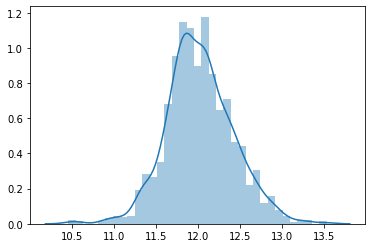

In [8]:
# 対数変換したものを分布表示
sns.distplot(sp_taisu)

In [10]:
sp_gy = pd.concat([sp_taisu,gy], axis=1)
display(sp_gy.head())

,SalePrice,GrLivArea,YearBuilt
0,12.247694,1710,2003
1,12.109011,1262,1976
2,12.317167,1786,2001
3,11.849398,1717,1915
4,12.429216,2198,2000


In [11]:
#nullデータ確認
sp_gy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
SalePrice    1460 non-null float64
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


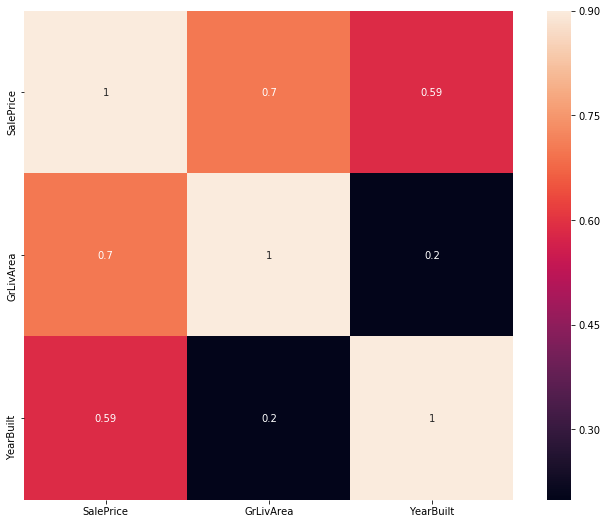

In [12]:
#どのくらい相関があるのか見てみる
import matplotlib.pyplot as plt
sp_gy_corr= sp_gy.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(sp_gy_corr, vmax=0.9, square=True,annot=True )

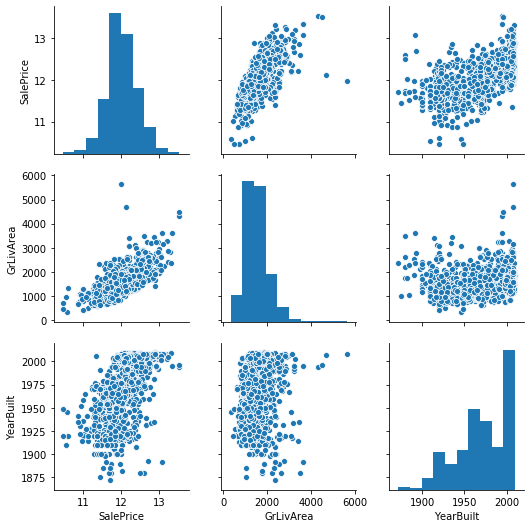

In [13]:
#対数変換した目的変数と説明変数
sns.pairplot(sp_gy)

In [57]:
sp_gy_no = pd.concat([sp,gy], axis=1)
#display(sp_gy_no)

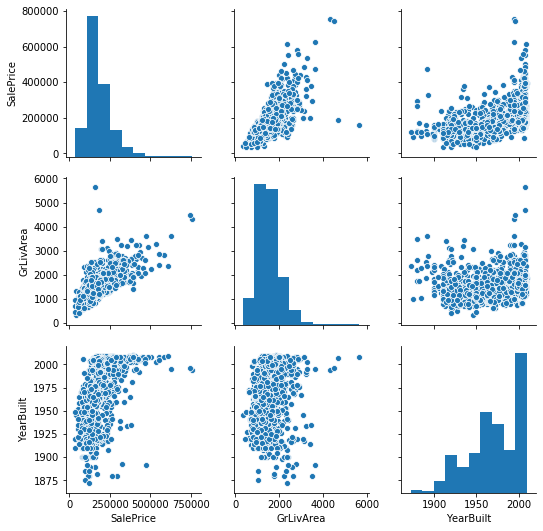

In [56]:
#説明変数を対数変換しなかった場合
sns.pairplot(sp_gy_no)

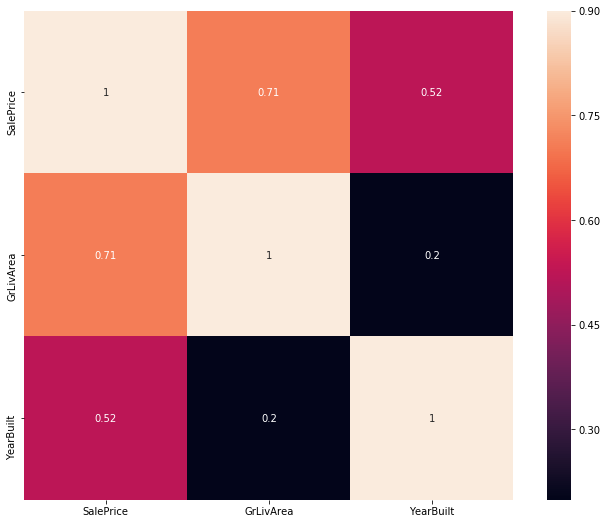

In [58]:
sp_gy_no_corr= sp_gy_no.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(sp_gy_no_corr, vmax=0.9, square=True,annot=True )

In [14]:
#テストデータとトレインデータに分ける
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(gy,sp_taisu,test_size=0.25,train_size=0.75,shuffle = True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# 前処理→標準化 必要？どちらも実施してみる
print(scaler.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [18]:
print(scaler.transform(X_train))

[[-0.25400176 -0.45263226]
 [ 0.29296183  0.23488203]
 [-0.43820255  0.66048611]
 ...
 [-0.49834975  0.16940448]
 [-0.59232975  1.24978407]
 [-0.56037655 -0.48537104]]


In [44]:
print(scaler.transform(X_test))

[[ 0.78672822  1.1926918 ]
 [-1.30798089  0.35113348]
 [ 0.52793695  1.15902946]
 [-0.67412979 -0.18746384]
 [ 0.93675215  0.82240614]
 [-1.37924225 -1.06268449]
 [ 0.11912174 -1.09634682]
 [ 0.05161097  1.12536713]
 [-0.20342971  1.05804247]
 [-0.55411064 -1.02902215]
 [-0.59911782 -0.42310017]
 [ 1.255553    0.55310748]
 [ 0.30102575 -1.8032558 ]
 [ 0.21851259  0.95705547]
 [-0.8579091  -0.4567625 ]
 [-0.95542465 -0.05281451]
 [ 0.92737566 -0.79338582]
 [-1.65678652 -0.05281451]
 [-0.98730474  0.01451016]
 [ 1.45058411 -0.62507416]
 [-1.57802396 -1.06268449]
 [ 0.30102575  0.95705547]
 [-0.73788996  1.1926918 ]
 [ 0.47730387 -1.16367148]
 [-0.16404843  0.18282182]
 [ 0.86174019  1.15902946]
 [-1.22921832 -0.01915218]
 [-0.11341535  0.48578281]
 [ 0.94987925  1.26001646]
 [ 0.36853652  1.0917048 ]
 [ 0.35165883  0.11549715]
 [-1.43737653 -1.53395714]
 [ 0.25976917  1.22635413]
 [ 0.40229191 -0.2547885 ]
 [-0.67788038 -0.72606116]
 [-0.39846082 -1.60128181]
 [ 0.51105925  0.9907178 ]
 

In [43]:
X_train_trans=scaler.transform(X_train)
X_test_trans=scaler.transform(X_test)

In [39]:
print(X_train_trans)

[[-0.25400176 -0.45263226]
 [ 0.29296183  0.23488203]
 [-0.43820255  0.66048611]
 ...
 [-0.49834975  0.16940448]
 [-0.59232975  1.24978407]
 [-0.56037655 -0.48537104]]


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 830 to 917
Data columns (total 2 columns):
GrLivArea    1095 non-null int64
YearBuilt    1095 non-null int64
dtypes: int64(2)
memory usage: 25.7 KB


In [41]:
#arrayに変換しなくても勝手になってた
X_train_trans.dtype

dtype('float64')

In [73]:
X_train_trans.sum()

3.275602011854062e-12

メモ
https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
#学習
lr.fit(X_train_trans,y_train)      

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [0.24056453 0.18603854]
intercept =  [12.02907858]


In [47]:
#予測
y_pred= lr.predict(X_test_trans)

In [49]:
lr.score(X_test_trans,y_test)

0.7567309827509019

In [51]:
#評価
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.03811570867262264

評価についてメモ：  
平均絶対誤差 (MAE, Mean Absolute Error) は、実際の値と予測値の絶対値を平均したものです。MAE が小さいほど誤差が少なく、予測モデルが正確に予測できていることを示し、MAE が大きいほど実際の値と予測値に誤差が大きく、予測モデルが正確に予測できていないといえます。計算式は以下となります。  
https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1

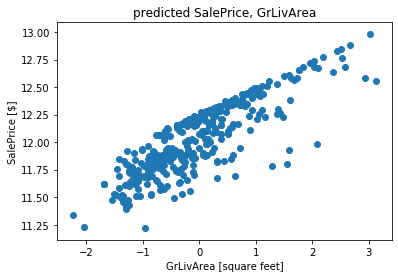

In [67]:
# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test_trans[:,0], y_pred[:,0])
plt.show()

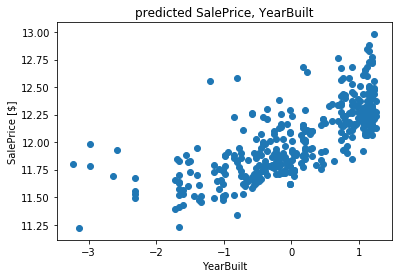

In [68]:
plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test_trans[:,1], y_pred[:,0])
plt.show()

In [60]:
print(X_test_trans[:,0:1].shape)

(365, 1)


In [63]:
print(y_pred[:,0].shape)

(365,)


In [70]:
#何も処理せず実施してみる(スケールの処理、標準化なし)

In [32]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(gy,sp,test_size=0.25,train_size=0.75,shuffle = True)

In [33]:
#学習
lr.fit(X_train_1,y_train_1)     

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#予測
y_pred_1= lr.predict(X_test_1)

In [35]:
lr.score(X_test_1,y_test_1)

0.7053056083029687

In [36]:
#評価
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_1,y_pred_1)

1938424467.1804044

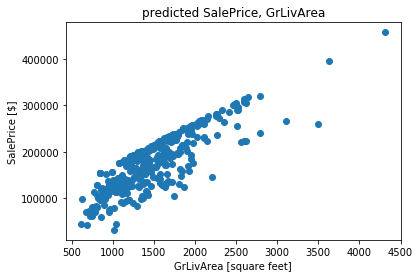

In [83]:
# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test_1["GrLivArea"], y_pred_1[:,0])
plt.show()

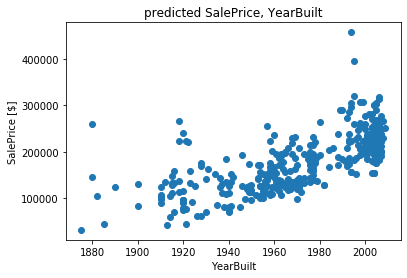

In [84]:
plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test_1["YearBuilt"], y_pred_1[:,0])
plt.show()

In [71]:
print(X_test_1.shape)

(365, 2)


In [72]:
print(y_pred_1.shape)

(365, 1)


前処理ありとなしでは、平均絶対誤差の数値がかなり変わった。価格を対数変換や説明変数を標準化した後は数字を戻して精度を出すべきなのか・・・？？

## 【問題3】手法の比較

In [86]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

l_reg = LinearRegression()
svr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

Linear Regression
MSE : 1938424467.1804044


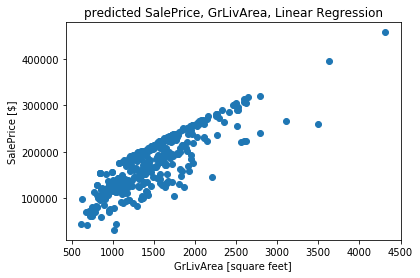

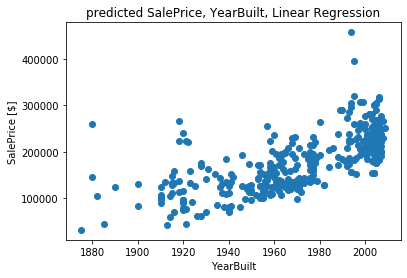

SVM
MSE : 6922632693.851071


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


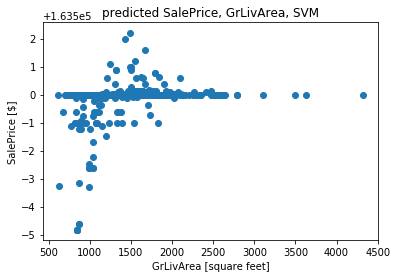

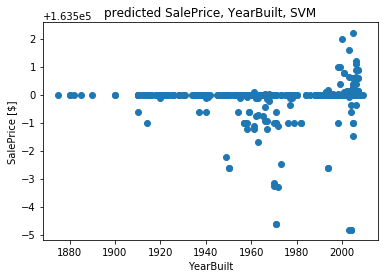

Decision Tree
MSE : 2414828359.6770167


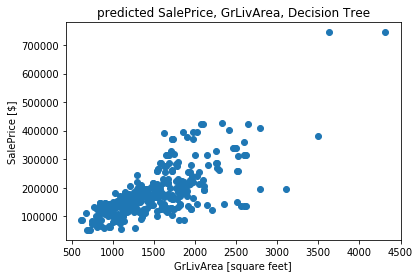

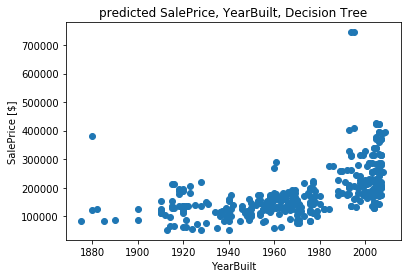

Random Forest
MSE : 1871843252.8590777


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


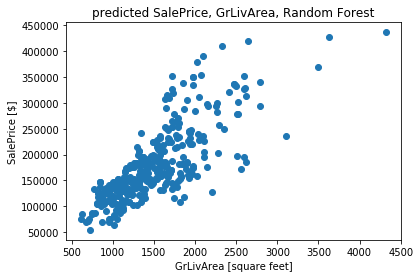

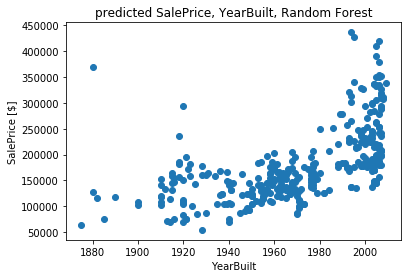

In [87]:
#サンプルの回答でfor使って一気に学習可視化できるものに書き換えてみる。
models = [l_reg, svr, dt, rf]
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list = []

for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_test_1)
    mse_list.append(mean_squared_error(y_test_1, y_pred))
    print("MSE : {}".format(mse_list[-1]))

    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test_1["GrLivArea"], y_pred)
    plt.show()

    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test_1["YearBuilt"], y_pred)
    plt.show()

In [88]:
#ちゃんと理解してなかったzipをメモ
#参考：https://note.nkmk.me/python-zip-usage-for/

In [90]:
print(model_names)
print(mse_list)

['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
[1938424467.1804044, 6922632693.851071, 2414828359.6770167, 1871843252.8590777]


考察：精度はRandom Forestが高くなった。  
それぞれの図については、Random Forest、Linear Regressionがなんとなくの正の相関、(Decision Treeもか)SVMのみ一部分が直線となってその他にデータが多少ばらけるというような図になり他とはデータの分散が違うように見えた。